In [88]:
#pip install tensorflow
#pip install sktime[dl]

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sktime.transformations.panel.reduce import Tabularizer

In [49]:
df = pd.read_csv("time_series/ts_transformed.csv")

In [51]:
# Seleziona X: tutte le colonne tra la 2ª e la 101ª (escludi 'id' e target)
X = df.iloc[:, 1:101]

# Seleziona y: colonna target 'rating_category'
y = df['rating_category']
# Crea una copia per sicurezza (opzionale)
y = df['rating_category'].copy()

# Unifica le classi: 'Low' → 'Medium Low'
y = y.replace({'Low': 'Medium Low'})
print(y.value_counts())

rating_category
Medium         387
High           377
Medium High    232
Medium Low     138
Name: count, dtype: int64


In [52]:
X = X.values
y_array = y.to_numpy()

In [53]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y_array, test_size=0.3, random_state=100, stratify=y_array)

In [55]:
from sktime.classification.deep_learning import CNNClassifier

In [56]:
cnn = CNNClassifier(n_conv_layers=2, random_state=0, verbose=True, n_epochs=100)

In [57]:
cnn.fit(X_train, y_train)

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 100, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_12 (Conv1D)              │ (None, 94, 6)          │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d_4             │ (None, 31, 6)          │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 25, 12)         │           516 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d_5             │ (None, 8, 12)          │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │           388 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 952 (3.72 KB)

 Trainable params: 952 (3.72 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3593 - loss: 1.3449
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4530 - loss: 1.2854
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4586 - loss: 1.2383
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4581 - loss: 1.2238
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4573 - loss: 1.2156
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4570 - loss: 1.2098
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4535 - loss: 1.2057
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4518 - loss: 1.2025
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4564 - loss: 1.2000
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4593 - loss: 1.1977
Epoch 11/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4551 - loss: 1.1956
Epoch 12/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

CNNClassifier(n_epochs=100, random_state=0, verbose=True)

In [58]:
cnn.score(X_test, y_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


0.41348973607038125

In [59]:
y_pred = cnn.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Accuracy 0.41348973607038125
F1-score [0.48076923 0.50980392 0.11650485 0.21538462]
              precision    recall  f1-score   support

        High       0.53      0.44      0.48       113
      Medium       0.41      0.67      0.51       116
 Medium High       0.18      0.09      0.12        70
  Medium Low       0.30      0.17      0.22        42

    accuracy                           0.41       341
   macro avg       0.36      0.34      0.33       341
weighted avg       0.39      0.41      0.38       341



In [79]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D, Dense, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical # Import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [80]:
# Reshape X_train and X_test to have a third dimension for features
X_train_rs = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rs = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [81]:
# Use LabelEncoder to convert string labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test) # Use the same encoder fitted on training data

# Now apply to_categorical to the integer-encoded labels
y_train_cat = to_categorical(y_train_encoded)
y_test_cat = to_categorical(y_test_encoded)


In [82]:
cnn_tuned = Sequential([
    Conv1D(filters=32, kernel_size=7, activation='relu', input_shape=(X_train_rs.shape[1], X_train_rs.shape[2])),
    MaxPooling1D(pool_size=2),  # ↓ Riduce la dimensione temporale
    Conv1D(filters=64, kernel_size=5, activation='relu'),  # Secondo layer convoluzionale
    GlobalAveragePooling1D(),  # ↓ Riassume il tutto in un vettore
    Dense(4, activation='softmax')  # Classifica in 4 classi
])

# Compile the model
cnn_tuned.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set up early stopping with patience
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:
# Train the model with a validation split
history = cnn_tuned.fit(
    X_train_rs,
    y_train_cat,
    validation_split=0.2,
    epochs=300,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.2558 - loss: 1.3644 - val_accuracy: 0.2767 - val_loss: 1.3105
Epoch 2/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4061 - loss: 1.2783 - val_accuracy: 0.4528 - val_loss: 1.2832
Epoch 3/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4404 - loss: 1.2644 - val_accuracy: 0.4591 - val_loss: 1.2568
Epoch 4/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4403 - loss: 1.2550 - val_accuracy: 0.4591 - val_loss: 1.2439
Epoch 5/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4384 - loss: 1.2519 - val_accuracy: 0.4591 - val_loss: 1.2383
Epoch 6/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4416 - loss: 1.2516 - val_accuracy: 0.4591 - val_loss: 1.2359
Epoch 7/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4413 - loss: 1.2511 - val_accuracy: 0.4591 - val_loss: 1.2355
Epoch 8/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4427 - loss: 1.2498 - val_accuracy: 0.

In [84]:
cnn_tuned.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_16 (Conv1D)              │ (None, 94, 32)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 47, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_17 (Conv1D)              │ (None, 43, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_5      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,462 (126.81 KB)

 Trainable params: 10,820 (42.27 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 21,642 (84.54 KB)

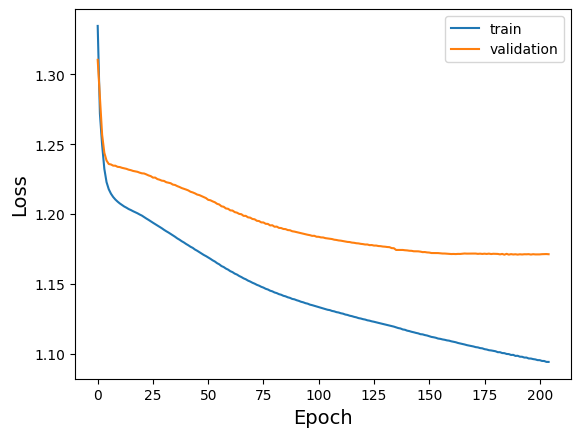

In [85]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend()
plt.show()

In [86]:
y_pred_cnn_tuned = cnn_tuned.predict(X_test_rs)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [87]:
# 10) Predizione su test set
y_pred_proba = cnn_tuned.predict(X_test_rs)
y_pred_classes = np.argmax(y_pred_proba, axis=1)

# 11) Metriche di valutazione (con label numeriche)
print('Accuracy: %.4f' % accuracy_score(y_test_encoded, y_pred_classes))
print('F1-score:', f1_score(y_test_encoded, y_pred_classes, average=None))
print(classification_report(y_test_encoded, y_pred_classes, target_names=label_encoder.classes_))

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Accuracy: 0.4868
F1-score: [0.59459459 0.55727554 0.02564103 0.30508475]
              precision    recall  f1-score   support

        High       0.61      0.58      0.59       113
      Medium       0.43      0.78      0.56       116
 Medium High       0.12      0.01      0.03        70
  Medium Low       0.53      0.21      0.31        42

    accuracy                           0.49       341
   macro avg       0.42      0.40      0.37       341
weighted avg       0.44      0.49      0.43       341

